In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Customer_Churn.csv')

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
data.shape

(7043, 21)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


***********************************************************************************

### Cleaning the data

In [7]:
data.drop('customerID', axis=1, inplace = True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [9]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
data.duplicated().sum()

22

In [11]:
data.drop_duplicates(inplace = True)

In [12]:
data.duplicated().sum()

0

In [13]:
data.reset_index(inplace = True)

In [14]:
data.shape

(7021, 21)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7021 entries, 0 to 7020
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             7021 non-null   int64  
 1   gender            7021 non-null   object 
 2   SeniorCitizen     7021 non-null   int64  
 3   Partner           7021 non-null   object 
 4   Dependents        7021 non-null   object 
 5   tenure            7021 non-null   int64  
 6   PhoneService      7021 non-null   object 
 7   MultipleLines     7021 non-null   object 
 8   InternetService   7021 non-null   object 
 9   OnlineSecurity    7021 non-null   object 
 10  OnlineBackup      7021 non-null   object 
 11  DeviceProtection  7021 non-null   object 
 12  TechSupport       7021 non-null   object 
 13  StreamingTV       7021 non-null   object 
 14  StreamingMovies   7021 non-null   object 
 15  Contract          7021 non-null   object 
 16  PaperlessBilling  7021 non-null   object 


In [16]:
data.drop('index', axis = 1, inplace = True)

In [17]:
for i in data:
    print(f"\n*********************** {i} ******************************")
    
    display(data[i].describe())
    
    print("*****************************************************")



*********************** gender ******************************


count     7021
unique       2
top       Male
freq      3541
Name: gender, dtype: object

*****************************************************

*********************** SeniorCitizen ******************************


count    7021.000000
mean        0.162512
std         0.368947
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: SeniorCitizen, dtype: float64

*****************************************************

*********************** Partner ******************************


count     7021
unique       2
top         No
freq      3619
Name: Partner, dtype: object

*****************************************************

*********************** Dependents ******************************


count     7021
unique       2
top         No
freq      4911
Name: Dependents, dtype: object

*****************************************************

*********************** tenure ******************************


count    7021.000000
mean       32.469449
std        24.534965
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

*****************************************************

*********************** PhoneService ******************************


count     7021
unique       2
top        Yes
freq      6339
Name: PhoneService, dtype: object

*****************************************************

*********************** MultipleLines ******************************


count     7021
unique       3
top         No
freq      3368
Name: MultipleLines, dtype: object

*****************************************************

*********************** InternetService ******************************


count            7021
unique              3
top       Fiber optic
freq             3090
Name: InternetService, dtype: object

*****************************************************

*********************** OnlineSecurity ******************************


count     7021
unique       3
top         No
freq      3490
Name: OnlineSecurity, dtype: object

*****************************************************

*********************** OnlineBackup ******************************


count     7021
unique       3
top         No
freq      3080
Name: OnlineBackup, dtype: object

*****************************************************

*********************** DeviceProtection ******************************


count     7021
unique       3
top         No
freq      3087
Name: DeviceProtection, dtype: object

*****************************************************

*********************** TechSupport ******************************


count     7021
unique       3
top         No
freq      3465
Name: TechSupport, dtype: object

*****************************************************

*********************** StreamingTV ******************************


count     7021
unique       3
top         No
freq      2802
Name: StreamingTV, dtype: object

*****************************************************

*********************** StreamingMovies ******************************


count     7021
unique       3
top         No
freq      2777
Name: StreamingMovies, dtype: object

*****************************************************

*********************** Contract ******************************


count               7021
unique                 3
top       Month-to-month
freq                3853
Name: Contract, dtype: object

*****************************************************

*********************** PaperlessBilling ******************************


count     7021
unique       2
top        Yes
freq      4161
Name: PaperlessBilling, dtype: object

*****************************************************

*********************** PaymentMethod ******************************


count                 7021
unique                   4
top       Electronic check
freq                  2359
Name: PaymentMethod, dtype: object

*****************************************************

*********************** MonthlyCharges ******************************


count    7021.000000
mean       64.851894
std        30.069001
min        18.250000
25%        35.750000
50%        70.400000
75%        89.900000
max       118.750000
Name: MonthlyCharges, dtype: float64

*****************************************************

*********************** TotalCharges ******************************


count     7021
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

*****************************************************

*********************** Churn ******************************


count     7021
unique       2
top         No
freq      5164
Name: Churn, dtype: object

*****************************************************


In [18]:
for i in data:
    print(f"\n*********************** {i} ******************************")
    
    display(data[i].value_counts())
    
    print("*****************************************************")



*********************** gender ******************************


gender
Male      3541
Female    3480
Name: count, dtype: int64

*****************************************************

*********************** SeniorCitizen ******************************


SeniorCitizen
0    5880
1    1141
Name: count, dtype: int64

*****************************************************

*********************** Partner ******************************


Partner
No     3619
Yes    3402
Name: count, dtype: int64

*****************************************************

*********************** Dependents ******************************


Dependents
No     4911
Yes    2110
Name: count, dtype: int64

*****************************************************

*********************** tenure ******************************


tenure
1     591
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

*****************************************************

*********************** PhoneService ******************************


PhoneService
Yes    6339
No      682
Name: count, dtype: int64

*****************************************************

*********************** MultipleLines ******************************


MultipleLines
No                  3368
Yes                 2971
No phone service     682
Name: count, dtype: int64

*****************************************************

*********************** InternetService ******************************


InternetService
Fiber optic    3090
DSL            2419
No             1512
Name: count, dtype: int64

*****************************************************

*********************** OnlineSecurity ******************************


OnlineSecurity
No                     3490
Yes                    2019
No internet service    1512
Name: count, dtype: int64

*****************************************************

*********************** OnlineBackup ******************************


OnlineBackup
No                     3080
Yes                    2429
No internet service    1512
Name: count, dtype: int64

*****************************************************

*********************** DeviceProtection ******************************


DeviceProtection
No                     3087
Yes                    2422
No internet service    1512
Name: count, dtype: int64

*****************************************************

*********************** TechSupport ******************************


TechSupport
No                     3465
Yes                    2044
No internet service    1512
Name: count, dtype: int64

*****************************************************

*********************** StreamingTV ******************************


StreamingTV
No                     2802
Yes                    2707
No internet service    1512
Name: count, dtype: int64

*****************************************************

*********************** StreamingMovies ******************************


StreamingMovies
No                     2777
Yes                    2732
No internet service    1512
Name: count, dtype: int64

*****************************************************

*********************** Contract ******************************


Contract
Month-to-month    3853
Two year          1695
One year          1473
Name: count, dtype: int64

*****************************************************

*********************** PaperlessBilling ******************************


PaperlessBilling
Yes    4161
No     2860
Name: count, dtype: int64

*****************************************************

*********************** PaymentMethod ******************************


PaymentMethod
Electronic check             2359
Mailed check                 1596
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

*****************************************************

*********************** MonthlyCharges ******************************


MonthlyCharges
20.05     59
19.85     45
19.95     44
19.70     43
19.90     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: count, Length: 1585, dtype: int64

*****************************************************

*********************** TotalCharges ******************************


TotalCharges
          11
19.75      9
20.2       8
19.9       7
19.65      7
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64

*****************************************************

*********************** Churn ******************************


Churn
No     5164
Yes    1857
Name: count, dtype: int64

*****************************************************


In [19]:
data[data['TotalCharges'] ==' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1081,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1338,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3323,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3817,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4370,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5207,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6652,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [20]:
n = 0
for i in data['TotalCharges']:
    
    if i == ' ':
        data.drop(n, inplace = True)
    n+=1

In [21]:
data[data['TotalCharges'] == ' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [22]:
data.shape

(7010, 20)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7010 entries, 0 to 7020
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7010 non-null   object 
 1   SeniorCitizen     7010 non-null   int64  
 2   Partner           7010 non-null   object 
 3   Dependents        7010 non-null   object 
 4   tenure            7010 non-null   int64  
 5   PhoneService      7010 non-null   object 
 6   MultipleLines     7010 non-null   object 
 7   InternetService   7010 non-null   object 
 8   OnlineSecurity    7010 non-null   object 
 9   OnlineBackup      7010 non-null   object 
 10  DeviceProtection  7010 non-null   object 
 11  TechSupport       7010 non-null   object 
 12  StreamingTV       7010 non-null   object 
 13  StreamingMovies   7010 non-null   object 
 14  Contract          7010 non-null   object 
 15  PaperlessBilling  7010 non-null   object 
 16  PaymentMethod     7010 non-null   object 
 17  

In [24]:
data.reset_index(inplace = True)

In [25]:
data.drop('index', axis = 1 ,inplace = True)

In [26]:
data['TotalCharges'] = data['TotalCharges'].astype(float)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7010 entries, 0 to 7009
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7010 non-null   object 
 1   SeniorCitizen     7010 non-null   int64  
 2   Partner           7010 non-null   object 
 3   Dependents        7010 non-null   object 
 4   tenure            7010 non-null   int64  
 5   PhoneService      7010 non-null   object 
 6   MultipleLines     7010 non-null   object 
 7   InternetService   7010 non-null   object 
 8   OnlineSecurity    7010 non-null   object 
 9   OnlineBackup      7010 non-null   object 
 10  DeviceProtection  7010 non-null   object 
 11  TechSupport       7010 non-null   object 
 12  StreamingTV       7010 non-null   object 
 13  StreamingMovies   7010 non-null   object 
 14  Contract          7010 non-null   object 
 15  PaperlessBilling  7010 non-null   object 
 16  PaymentMethod     7010 non-null   object 


In [28]:
n = 0
for i in data['OnlineSecurity']:

    if i == 'No internet service':
        data['OnlineSecurity'].iloc[n] = 'No'

    n+=1

######################################################################
n = 0
for i in data['OnlineBackup']:

    if i == 'No internet service':
        data['OnlineBackup'].iloc[n] = 'No'

    n+=1

######################################################################
n = 0
for i in data['DeviceProtection']:

    if i == 'No internet service':
        data['DeviceProtection'].iloc[n] = 'No'

    n+=1

######################################################################
n = 0
for i in data['TechSupport']:

    if i == 'No internet service':
        data['TechSupport'].iloc[n] = 'No'

    n+=1

######################################################################
n = 0
for i in data['StreamingMovies']:

    if i == 'No internet service':
        data['StreamingMovies'].iloc[n] = 'No'

    n+=1

######################################################################
n = 0
for i in data['StreamingTV']:

    if i == 'No internet service':
        data['StreamingTV'].iloc[n] = 'No'

    n+=1

In [29]:
for i in range(len(data)):

    if data['MonthlyCharges'].iloc[i] > data['TotalCharges'].loc[i]:
        
        data.drop(i, inplace = True)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7010 entries, 0 to 7009
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7010 non-null   object 
 1   SeniorCitizen     7010 non-null   int64  
 2   Partner           7010 non-null   object 
 3   Dependents        7010 non-null   object 
 4   tenure            7010 non-null   int64  
 5   PhoneService      7010 non-null   object 
 6   MultipleLines     7010 non-null   object 
 7   InternetService   7010 non-null   object 
 8   OnlineSecurity    7010 non-null   object 
 9   OnlineBackup      7010 non-null   object 
 10  DeviceProtection  7010 non-null   object 
 11  TechSupport       7010 non-null   object 
 12  StreamingTV       7010 non-null   object 
 13  StreamingMovies   7010 non-null   object 
 14  Contract          7010 non-null   object 
 15  PaperlessBilling  7010 non-null   object 
 16  PaymentMethod     7010 non-null   object 


In [31]:
for i in range(len(data)):

    if data['PhoneService'].iloc[i] == "No" and data['MultipleLines'].iloc[i] != "No phone service":

        data['MultipleLines'].iloc[i] = "No phone service"
        

In [32]:
for i in data:
    print(f"\n*********************** {i} ******************************")
    
    display(data[i].value_counts())
    
    print("*****************************************************")



*********************** gender ******************************


gender
Male      3535
Female    3475
Name: count, dtype: int64

*****************************************************

*********************** SeniorCitizen ******************************


SeniorCitizen
0    5869
1    1141
Name: count, dtype: int64

*****************************************************

*********************** Partner ******************************


Partner
No     3617
Yes    3393
Name: count, dtype: int64

*****************************************************

*********************** Dependents ******************************


Dependents
No     4911
Yes    2099
Name: count, dtype: int64

*****************************************************

*********************** tenure ******************************


tenure
1     591
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: count, Length: 72, dtype: int64

*****************************************************

*********************** PhoneService ******************************


PhoneService
Yes    6330
No      680
Name: count, dtype: int64

*****************************************************

*********************** MultipleLines ******************************


MultipleLines
No                  3363
Yes                 2967
No phone service     680
Name: count, dtype: int64

*****************************************************

*********************** InternetService ******************************


InternetService
Fiber optic    3090
DSL            2414
No             1506
Name: count, dtype: int64

*****************************************************

*********************** OnlineSecurity ******************************


OnlineSecurity
No     4995
Yes    2015
Name: count, dtype: int64

*****************************************************

*********************** OnlineBackup ******************************


OnlineBackup
No     4585
Yes    2425
Name: count, dtype: int64

*****************************************************

*********************** DeviceProtection ******************************


DeviceProtection
No     4592
Yes    2418
Name: count, dtype: int64

*****************************************************

*********************** TechSupport ******************************


TechSupport
No     4970
Yes    2040
Name: count, dtype: int64

*****************************************************

*********************** StreamingTV ******************************


StreamingTV
No     4307
Yes    2703
Name: count, dtype: int64

*****************************************************

*********************** StreamingMovies ******************************


StreamingMovies
No     4279
Yes    2731
Name: count, dtype: int64

*****************************************************

*********************** Contract ******************************


Contract
Month-to-month    3853
Two year          1685
One year          1472
Name: count, dtype: int64

*****************************************************

*********************** PaperlessBilling ******************************


PaperlessBilling
Yes    4158
No     2852
Name: count, dtype: int64

*****************************************************

*********************** PaymentMethod ******************************


PaymentMethod
Electronic check             2359
Mailed check                 1588
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: count, dtype: int64

*****************************************************

*********************** MonthlyCharges ******************************


MonthlyCharges
20.05     59
19.85     44
19.95     44
19.90     43
19.65     42
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: count, Length: 1584, dtype: int64

*****************************************************

*********************** TotalCharges ******************************


TotalCharges
19.75      9
20.20      8
19.90      7
19.65      7
20.05      6
          ..
6849.40    1
692.35     1
130.15     1
3211.90    1
6844.50    1
Name: count, Length: 6530, dtype: int64

*****************************************************

*********************** Churn ******************************


Churn
No     5153
Yes    1857
Name: count, dtype: int64

*****************************************************


*****************************************

# EDA

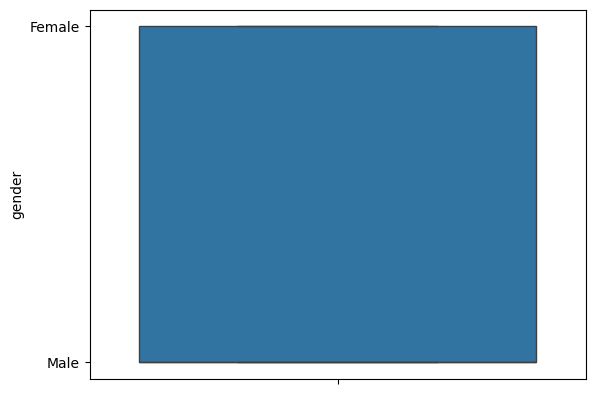

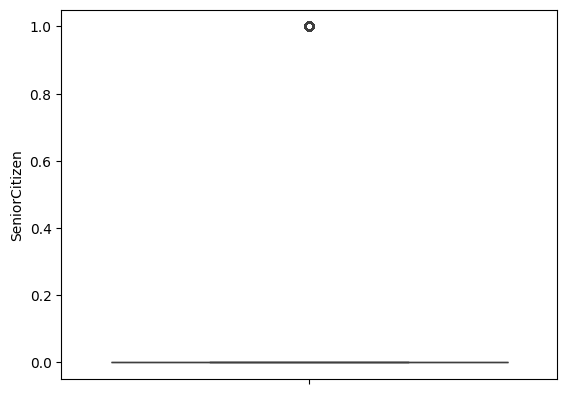

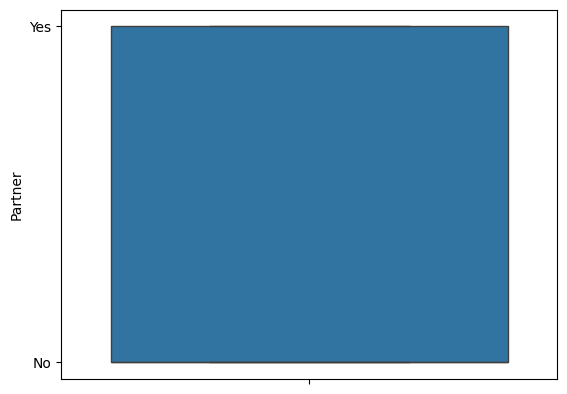

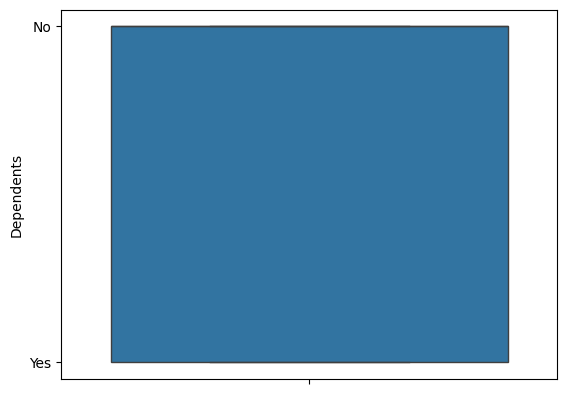

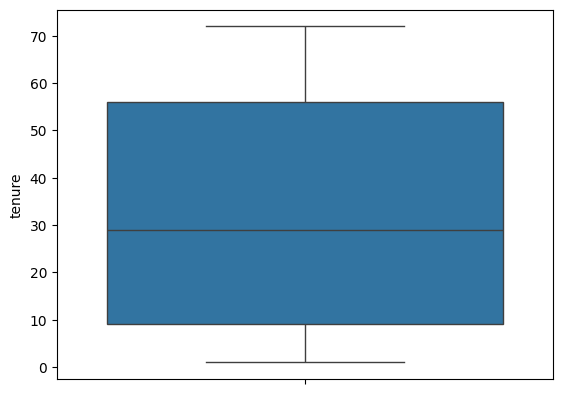

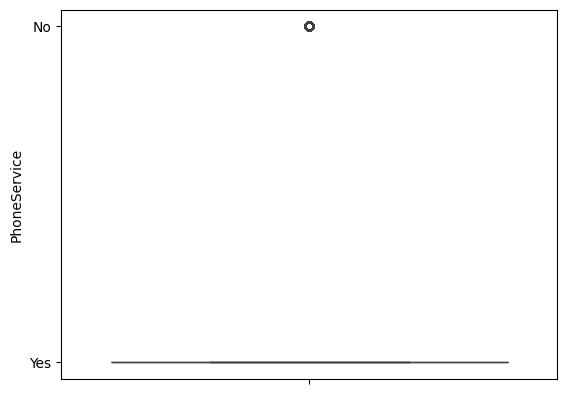

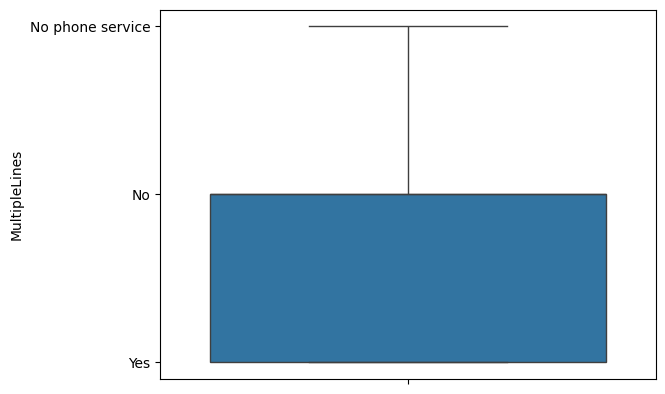

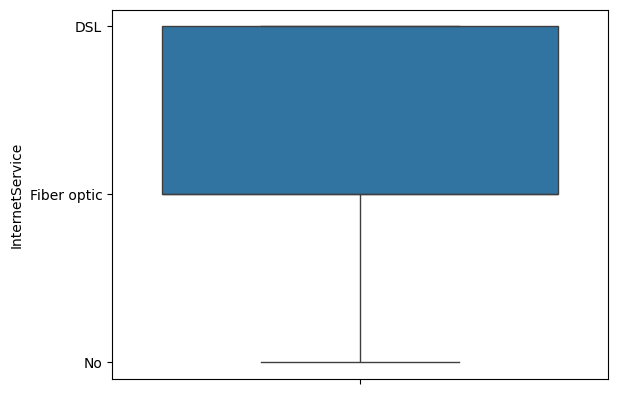

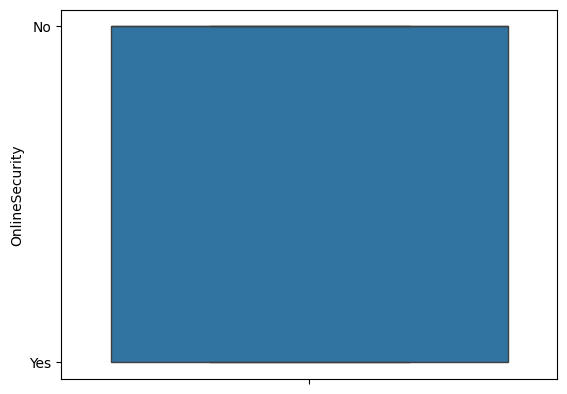

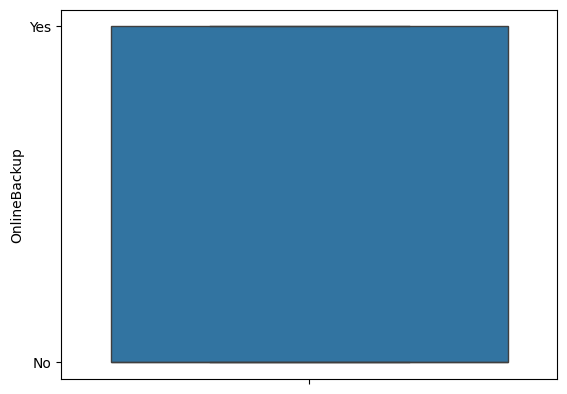

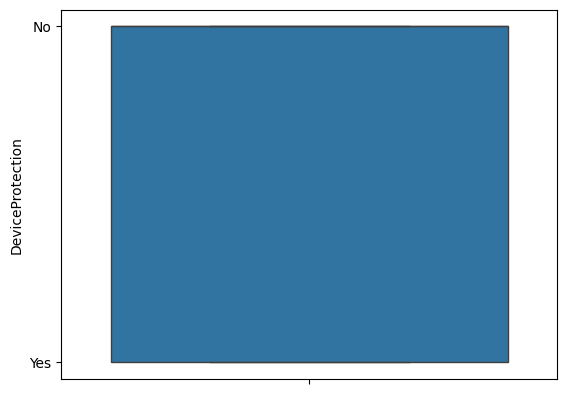

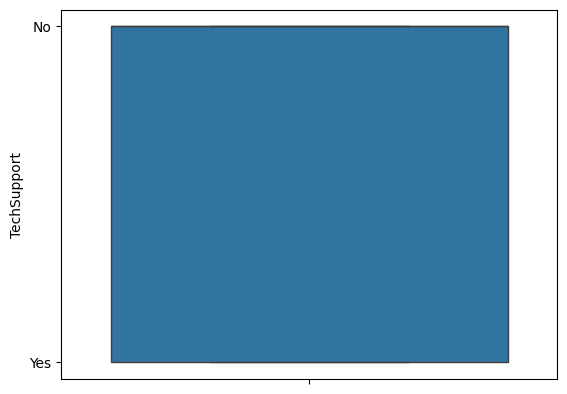

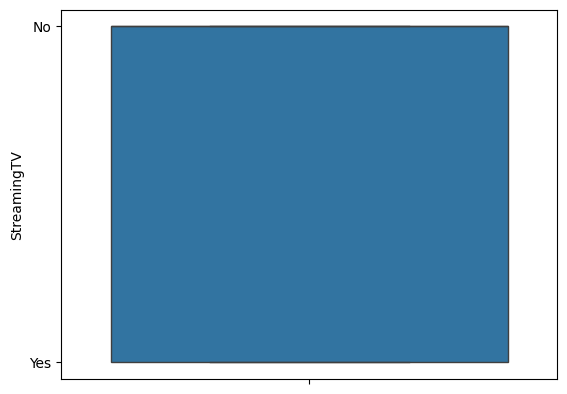

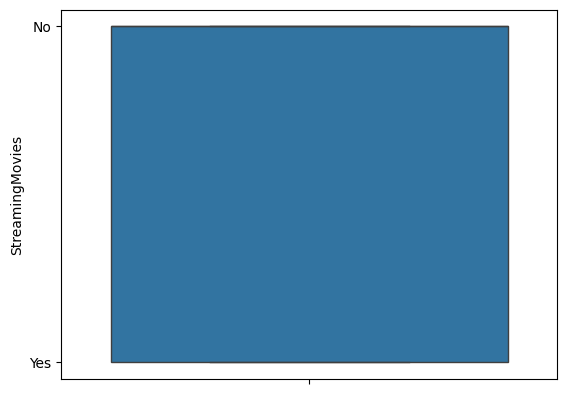

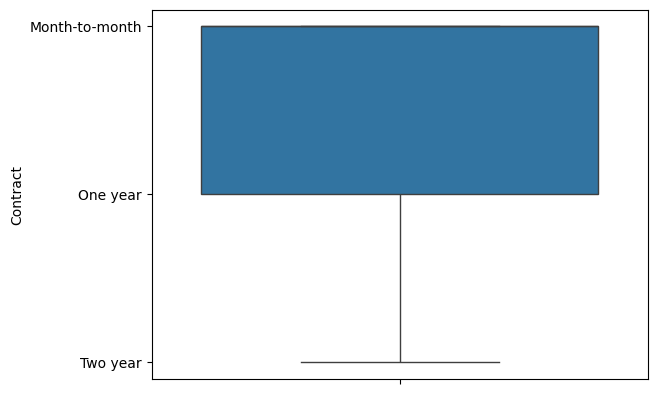

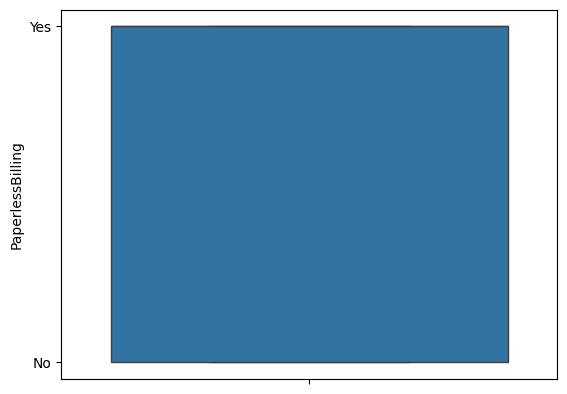

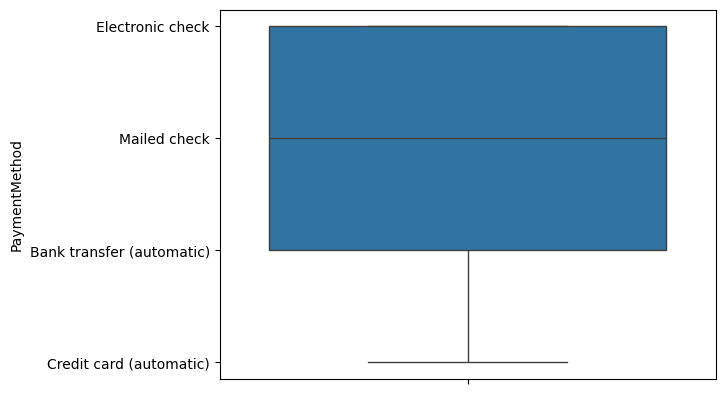

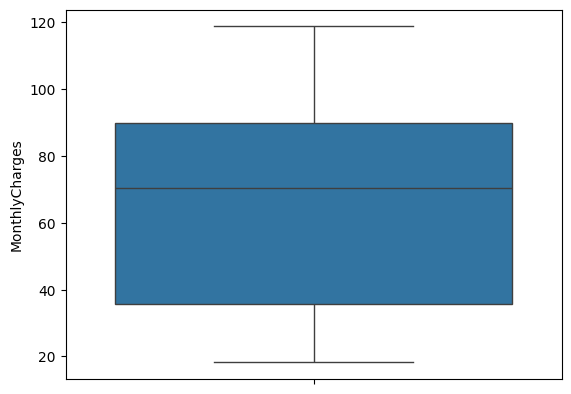

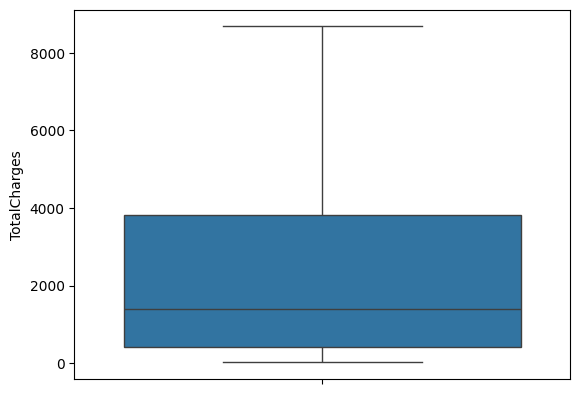

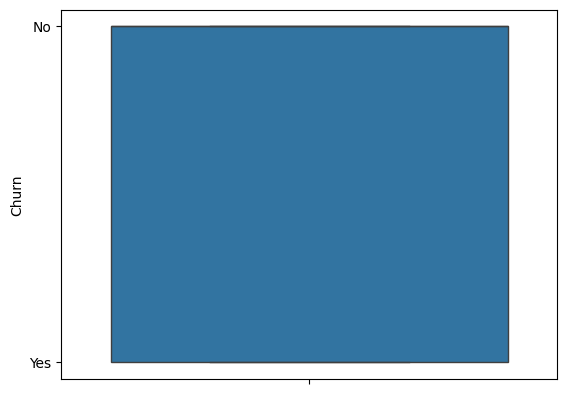

In [33]:
for i in data:
    sns.boxplot(data[i])
    plt.show()

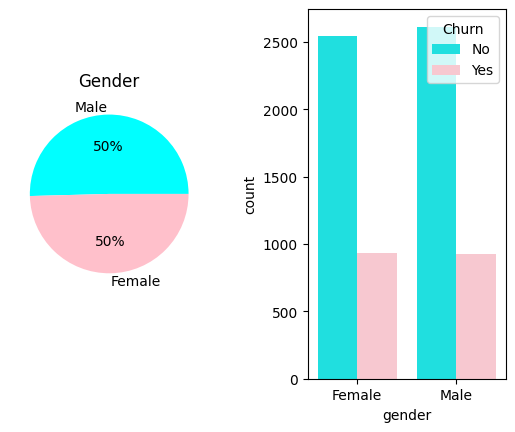

In [34]:
colors = ['cyan', 'pink']
keys = ['Male', 'Female']


plt.subplot(1, 2, 1)
plt.pie(data['gender'].value_counts(), labels=keys, autopct='%.0f%%', colors = colors)
plt.title('Gender')

plt.subplot(1, 2, 2)
sns.countplot(x = 'gender', hue ='Churn', data = data, palette = colors)


plt.subplots_adjust(wspace=0.5)

plt.show()



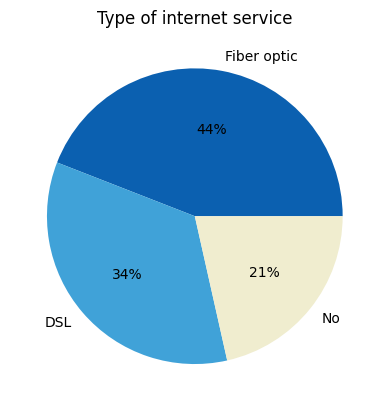

In [35]:
keys = ['Fiber optic', 'DSL', 'No']
colors = ['#0B60B0', '#40A2D8', '#F0EDCF']
plt.pie(data['InternetService'].value_counts(), labels=keys, colors = colors , autopct='%.0f%%')
plt.title('Type of internet service')
plt.show()

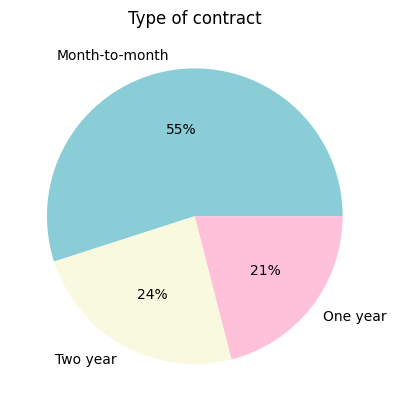

In [36]:
keys = ['Month-to-month', 'Two year', 'One year']
colors = ['#8ACDD7', '#F9F9E0', '#FFC0D9']
plt.pie(data['Contract'].value_counts(), labels=keys, colors = colors , autopct='%.0f%%')
plt.title('Type of contract')
plt.show()

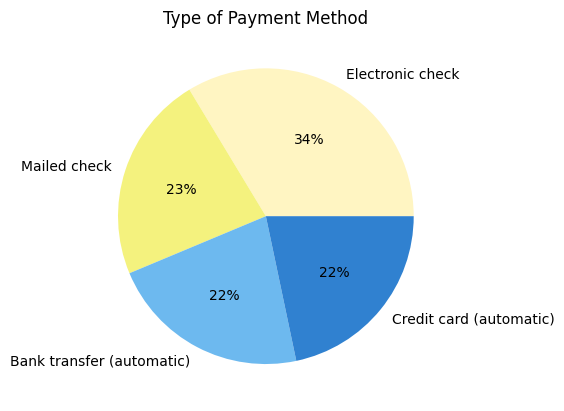

In [37]:
keys = ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']
colors = ['#FFF5C2', '#F4F27E', '#6DB9EF', '#3081D0']
plt.pie(data['PaymentMethod'].value_counts(), labels=keys, colors = colors , autopct='%.0f%%')
plt.title('Type of Payment Method')
plt.show()

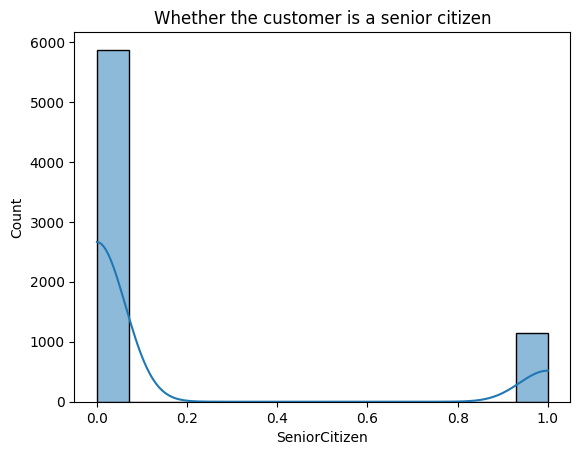

In [38]:
sns.histplot(x = 'SeniorCitizen', kde = True, data = data)

plt.title('Whether the customer is a senior citizen')

plt.show()

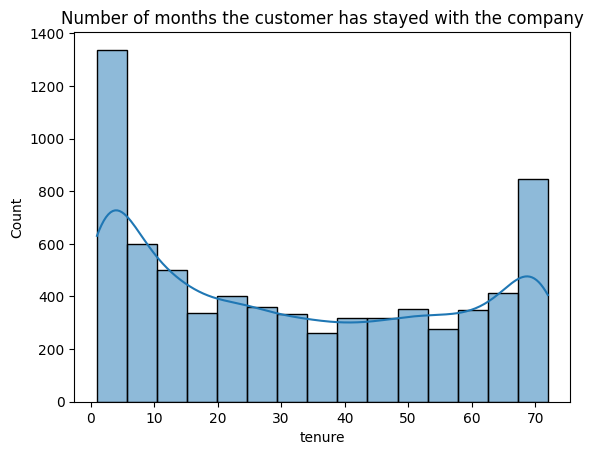

In [39]:
sns.histplot(x = 'tenure', kde = True, data = data)

plt.title('Number of months the customer has stayed with the company')

plt.show()

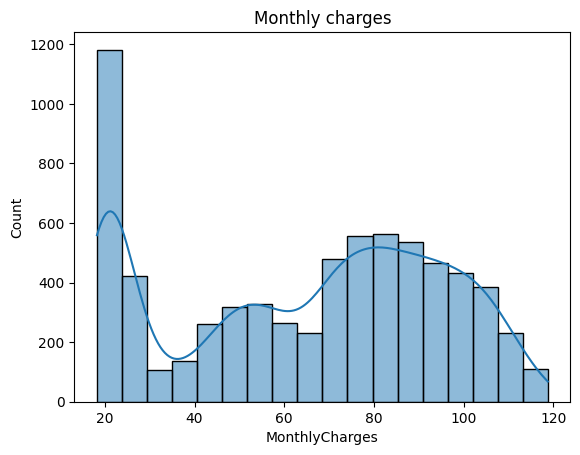

In [40]:
sns.histplot(x = 'MonthlyCharges', kde = True, data = data)

plt.title('Monthly charges')

plt.show()

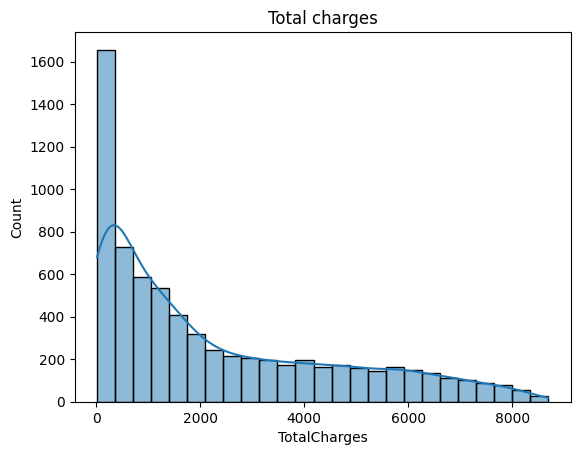

In [41]:
sns.histplot(x = 'TotalCharges', kde = True, data = data)

plt.title('Total charges')

plt.show()

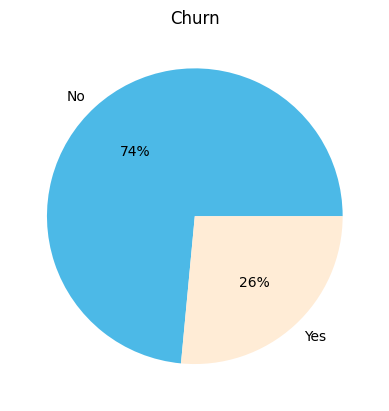

In [42]:
keys = ['No', 'Yes']
colors = ['#4CB9E7', '#FFECD6']
plt.pie(data['Churn'].value_counts(), labels=keys, autopct='%.0f%%', colors = colors)
plt.title('Churn')
plt.show()

************************************************************************

### Data preprocessing and Building model

In [43]:
X = data.drop('Churn', axis = 1)
y = data['Churn']

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=0)

In [45]:
X_train.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1246,Female,0,No,No,1,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,75.80,75.80
675,Female,0,No,No,48,Yes,Yes,No,No,No,No,No,No,No,One year,No,Bank transfer (automatic),24.55,1203.95
381,Male,0,No,No,1,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,No,Mailed check,50.65,50.65


In [46]:
y_train

1246    Yes
675      No
381     Yes
2303     No
6869     No
       ... 
4931    Yes
3264    Yes
1653     No
2607    Yes
2732     No
Name: Churn, Length: 5608, dtype: object

In [47]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

y_train_enc = label_encoder.fit_transform(y_train)
y_test_enc = label_encoder.fit_transform(y_test)

In [48]:
y_train_enc

array([1, 0, 1, ..., 0, 1, 0])

In [49]:
cat_data = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
            'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport'
            ,'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

In [50]:
num_data = list(X_train.drop(cat_data, axis =1))

In [51]:
num_data

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [52]:
print(num_data)
print(100*"*")
print(cat_data)

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
****************************************************************************************************
['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [53]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [54]:
num_pip = Pipeline([
    ('std_scaler', StandardScaler())
])

In [55]:
full_pip = ColumnTransformer([
    ('num', num_pip, num_data),
    ('cat', OneHotEncoder(), cat_data)
])

In [56]:
X_train_p = full_pip.fit_transform(X_train)
X_test_p = full_pip.fit_transform(X_test)

In [57]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb


dec_tree_pipe = Pipeline([
    ("scaler1", StandardScaler(with_mean=False)),
    ("DecisionTree", DecisionTreeClassifier())  
])

ranfor_pipe = Pipeline([
    ("scalar2", StandardScaler(with_mean=False)),
    ("RandomForest", RandomForestClassifier())  
])

gbr_pipe = Pipeline([
    ('scaler3', StandardScaler(with_mean=False)),
    ('GradientBoosting', GradientBoostingClassifier())  
])

xgb_pipe = Pipeline([
    ('scaler4', StandardScaler(with_mean=False)),
    ('XGBoost', xgb.XGBClassifier())
])

In [58]:
models = [dec_tree_pipe, ranfor_pipe, gbr_pipe, xgb_pipe]

In [59]:
for model in models:
    model.fit(X_train_p, y_train_enc)

In [60]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

cv_results_accuracy = []


for model in models:

    cv_scores = cross_val_score(model, X_train_p, y_train_enc, scoring="accuracy", cv=10)
    
    cv_results_accuracy.append(cv_scores)



In [61]:
print('DecisionTree', cv_results_accuracy[0].mean())
print('RandomForest', cv_results_accuracy[1].mean())
print('GradientBoosting', cv_results_accuracy[2].mean())
print('XGBoost', cv_results_accuracy[3].mean())

DecisionTree 0.7193248663101605
RandomForest 0.7842408326967151
GradientBoosting 0.7986802902979374
XGBoost 0.7826340081487141


### Model Evaluation

In [62]:
y_pred = gbr_pipe.predict(X_test_p)


In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

gbr_Accuracy = accuracy_score(y_test_enc, y_pred)
print("gbr_Accuracy:", gbr_Accuracy)

gbr_precision = precision_score(y_test_enc, y_pred)
print("gbr_Precision:", gbr_precision)

gbr_recall = recall_score(y_test_enc, y_pred)
print("gbr_Recall:", gbr_recall)

gbr_f1 = f1_score(y_test_enc, y_pred)
print("gbr_F1-score:", gbr_f1)

gbr_matrix = confusion_matrix(y_test_enc, y_pred)
print("gbr_Confusion matrix:")
print(gbr_matrix)

gbr_roc_auc = roc_auc_score(y_test_enc, y_pred)
print("ROC AUC score:", gbr_roc_auc)

gbr_Accuracy: 0.8067047075606276
gbr_Precision: 0.6723549488054608
gbr_Recall: 0.5295698924731183
gbr_F1-score: 0.5924812030075188
gbr_Confusion matrix:
[[934  96]
 [175 197]]
ROC AUC score: 0.7181830044889863


******   Do UnderSampler   *******

In [64]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)

X_train, y_train_unsample = rus.fit_resample(X_train, y_train)

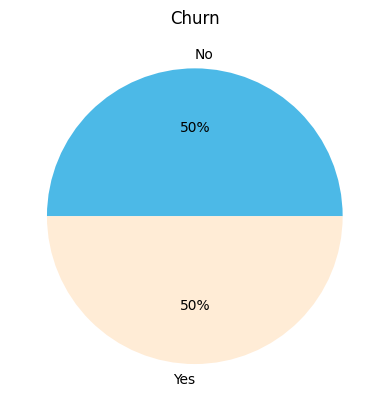

In [65]:
keys = ['No', 'Yes']
colors = ['#4CB9E7', '#FFECD6']
plt.pie(y_train_unsample.value_counts(), labels=keys, autopct='%.0f%%', colors = colors)
plt.title('Churn')
plt.show()

In [66]:
y_train_unsample_enc = label_encoder.fit_transform(y_train_unsample)
y_test_enc = label_encoder.fit_transform(y_test)

In [67]:
y_train_unsample_enc

array([0, 0, 0, ..., 1, 1, 1])

In [68]:
X_train_p = full_pip.fit_transform(X_train)
X_test_p = full_pip.fit_transform(X_test)

In [69]:
for model in models:
    model.fit(X_train_p, y_train_unsample_enc)

In [70]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

cv_results_accuracy = []


for model in models:

    cv_scores = cross_val_score(model, X_train_p, y_train_unsample_enc, scoring="accuracy", cv=10)
    
    cv_results_accuracy.append(cv_scores)


In [71]:
print('DecisionTree', cv_results_accuracy[0].mean())
print('RandomForest', cv_results_accuracy[1].mean())
print('GradientBoosting', cv_results_accuracy[2].mean())
print('XGBoost', cv_results_accuracy[3].mean())

DecisionTree 0.6734006734006734
RandomForest 0.7491582491582491
GradientBoosting 0.771043771043771
XGBoost 0.7377104377104378


In [72]:
y_pred = gbr_pipe.predict(X_test_p)

In [73]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

gbr_Accuracy = accuracy_score(y_test_enc, y_pred)
print("gbr_Accuracy:", gbr_Accuracy)

gbr_precision = precision_score(y_test_enc, y_pred)
print("gbr_Precision:", gbr_precision)

gbr_recall = recall_score(y_test_enc, y_pred)
print("gbr_Recall:", gbr_recall)

gbr_f1 = f1_score(y_test_enc, y_pred)
print("gbr_F1-score:", gbr_f1)

gbr_matrix = confusion_matrix(y_test_enc, y_pred)
print("gbr_Confusion matrix:")
print(gbr_matrix)

gbr_roc_auc = roc_auc_score(y_test_enc, y_pred)
print("ROC AUC score:", gbr_roc_auc)

gbr_Accuracy: 0.7232524964336662
gbr_Precision: 0.4866220735785953
gbr_Recall: 0.782258064516129
gbr_F1-score: 0.6
gbr_Confusion matrix:
[[723 307]
 [ 81 291]]
ROC AUC score: 0.7420999060444723


****************************************************

### I'll adopt the "GradientBoosting" model 

:)